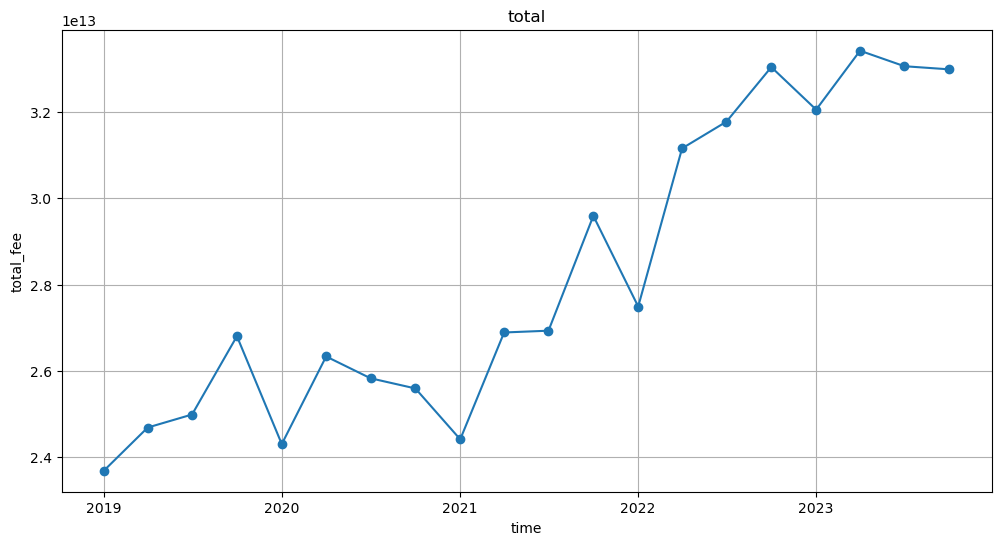

ADF Statistic: -0.49972814996279613
p-value: 0.8920695353833445
                               SARIMAX Results                                
Dep. Variable:                  총매출금액   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -559.923
Date:                Wed, 28 Aug 2024   AIC                           1125.846
Time:                        23:18:20   BIC                           1128.679
Sample:                    01-01-2019   HQIC                          1126.325
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9331      0.065    -14.395      0.000      -1.060      -0.806
ma.L1          0.9997      0.288      3.468      0.001       0.435 

C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\anacond

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA



# 데이터 로드 (예시: 'data.csv' 파일에서)
data = pd.read_csv(r"C:/Users/alfm0/sf6-data/data_csv/all_year_sales.csv")

# 기준_년분기_코드 열을 datetime으로 변환
def convert_to_datetime(quarter_code):
    year = int(str(quarter_code)[:-1])  # 연도 추출
    quarter = int(str(quarter_code)[-1])  # 분기 추출
    month = (quarter - 1) * 3 + 1  # 분기를 월로 변환 (1, 4, 7, 10)
    return pd.Timestamp(year=year, month=month, day=1)

# 새로운 열 추가
data['기준_년분기_코드'] = data['기준_년분기_코드'].apply(convert_to_datetime)

# 분기별 총매출 계산
data['총매출금액'] = data['당월_매출_금액']  # 당월 매출 금액이 있는 열 이름을 사용하세요
quarterly_sales = data.groupby('기준_년분기_코드')['총매출금액'].sum().reset_index()


# 시계열 데이터로 설정
quarterly_sales.set_index('기준_년분기_코드', inplace=True)

# # 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales, marker='o')
plt.title('total')
plt.xlabel('time')
plt.ylabel('total_fee')
plt.grid()
plt.show()

# ADF 검정으로 정상성 확인
adf_result = adfuller(quarterly_sales['총매출금액'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# ARIMA 모델 적합
model = ARIMA(quarterly_sales['총매출금액'], order=(1, 1, 1))  # (p, d, q) 값은 데이터에 따라 조정 필요
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())

# 예측
forecast = model_fit.forecast(steps=4)  # 다음 4분기 예측
print('다음 4분기 총매출 예측:', forecast)

# 비정상성을 보정하기 위해 차분 수행
quarterly_sales['차분된_총매출금액'] = quarterly_sales['총매출금액'].diff().dropna()

# 차분된 데이터에 대해 ADF 검정 수행
adf_result_diff = adfuller(quarterly_sales['차분된_총매출금액'].dropna())
print('차분 후 ADF Statistic:', adf_result_diff[0])
print('차분 후 p-value:', adf_result_diff[1])

# ARIMA 모델 적합 (차분된 데이터 사용)
model = ARIMA(quarterly_sales['차분된_총매출금액'].dropna(), order=(1, 0, 1))  # (p, d, q) 값 조정
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())

# 예측 (차분된 데이터로 예측한 후 원래 데이터로 변환)
forecast_diff = model_fit.forecast(steps=4)
forecast = quarterly_sales['총매출금액'].iloc[-1] + forecast_diff.cumsum()  # 마지막 관측치에 차분된 예측값을 더함
print('다음 4분기 총매출 예측:', forecast)
